<a href="https://colab.research.google.com/github/Eyyup-kardes/DOGAL-DIL-ISLEME/blob/main/Gune%C5%9F%20Krem%C4%B1%20yorumlar%C4%B1%20anal%C4%B1z%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob
!pip install -U nltk  # NLTK kütüphanesini güncelle
!pip install pandas matplotlib
!pip install pandas



In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk

# Gerekli NLTK kaynaklarını indir
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Duygu analizi fonksiyonu
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    # Pozitif, negatif veya nötr olarak sınıflandır
    if analysis.sentiment.polarity > 0:
        return "Olumlu"
    elif analysis.sentiment.polarity < 0:
        return "Olumsuz"
    else:
        return "Nötr"

# Yorumların duygu analizini yap
df['Duygu'] = df['Yorum'].apply(analyze_sentiment)

# Sonuçları görüntüle
print(df)

# Sonuçları yeni bir CSV dosyasına kaydet
output_file_path = '/content/yorumlar_duygu_analizi.csv'  # Çıktı dosyasının yolunu belirtin
df.to_csv(output_file_path, index=False, encoding='utf-8')
print(f"Duygu analiz sonuçları {output_file_path} dosyasına kaydedildi.")

                                                Yorum   Duygu
0              Beğendim ama yeterince korumuyor bence    Nötr
1   bu krem gercekten harika cilt tonumu esitliyor...    Nötr
2   nemlendirici etkisi çok iyi. herhangi bir sivi...    Nötr
3   cok iyi koruma sagladigini dusunuyorum kolay d...    Nötr
4                            Çok sevdıyım bir urun 👏🏻    Nötr
5   severek kullanıyorum, indikce stok yapıyorum. ...    Nötr
6   cok seviyorum yuzumu yumusacik ve parlak yapiy...    Nötr
7   Çok güzel geldi severek kullanıyorum cildime ç...    Nötr
8   dünyanın en bereketli ürünü diyebilirim kuru c...    Nötr
9   hep kullandığım güneş kremi herkese tavsiye ed...    Nötr
10  sureklı kullanıyorum cıldımı bebek gibi yaptıı...    Nötr
11  Harika bir güneş kremi indirimde aldım stoklam...    Nötr
12  cildi ışıl ışıl gösteriyor bence en iyi güneş ...    Nötr
13  çok iyi nemlendiriyor, indirime girince kaçırm...    Nötr
14  harika bir güneş kremi indirime girdikçe alıyorum    Nötr
15      

In [ ]:
import pandas as pd

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Toplam harf sayısını hesaplama
total_letters = df['Yorum'].str.replace(r'[^a-zA-ZçğıöşüÇĞİÖŞÜ]', '', regex=True).str.len().sum()

# Sonucu yazdır
print(f"Toplam harf sayısı: {total_letters}")


Toplam harf sayısı: 4976


In [ ]:
import pandas as pd

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Toplam kelime sayısını hesaplama
total_words = df['Yorum'].str.split().str.len().sum()

# "ve" kelimesinin sayısını hesaplama
ve_count = df['Yorum'].str.lower().str.count(r'\bve\b').sum()

# Sonuçları yazdırma
print(f"Toplam kelime sayısı: {total_words}")
print(f"'ve' kelimesinin kullanımı: {ve_count} kez")


Toplam kelime sayısı: 805
've' kelimesinin kullanımı: 13 kez


In [ ]:
import pandas as pd

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Toplam boşluk sayısını hesaplama
total_spaces = df['Yorum'].str.count(' ').sum()

# Sonucu yazdırma
print(f"Toplam boşluk sayısı: {total_spaces}")


Toplam boşluk sayısı: 744


In [ ]:
import pandas as pd
from collections import Counter
import re

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Yorumları birleştir
all_comments = ' '.join(df['Yorum'].astype(str))

# Kelimeleri temizle ve listeye çevir
words = re.findall(r'\w+', all_comments.lower())  # Küçük harfe çevir ve kelimeleri ayır

# Kelimeleri say
word_counts = Counter(words)

# En çok kullanılan kelimeleri al (örneğin, en fazla 10 kelime)
most_common_words = word_counts.most_common(10)

# Sonuçları yazdır
print("En çok kullanılan kelimeler:")
for word, count in most_common_words:
    print(f"{word}: {count} kez")


En çok kullanılan kelimeler:
çok: 35 kez
bir: 21 kez
güzel: 20 kez
ve: 13 kez
iyi: 12 kez
güneş: 11 kez
de: 9 kez
kremi: 9 kez
ama: 8 kez
bu: 8 kez


<ipython-input-16-25ffbb48af85>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sıklık', y='Kelimeler', data=words_df, palette='viridis')


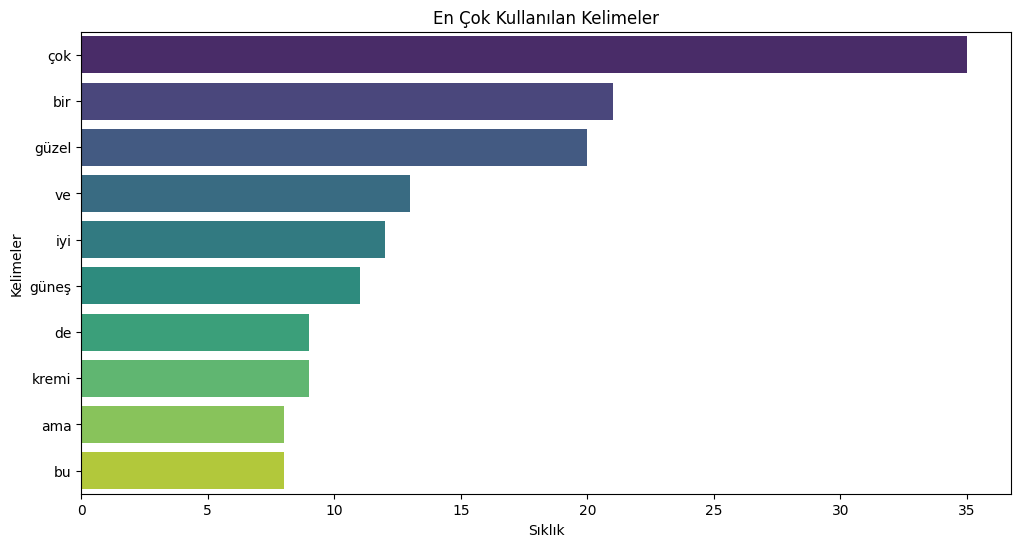

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Yorumları birleştir
all_comments = ' '.join(df['Yorum'].astype(str))

# Kelimeleri temizle ve listeye çevir
words = re.findall(r'\w+', all_comments.lower())  # Küçük harfe çevir ve kelimeleri ayır

# Kelimeleri say
word_counts = Counter(words)

# En çok kullanılan kelimeleri al (örneğin, en fazla 10 kelime)
most_common_words = word_counts.most_common(10)

# DataFrame oluştur
words_df = pd.DataFrame(most_common_words, columns=['Kelimeler', 'Sıklık'])

# Grafiği çiz
plt.figure(figsize=(12, 6))
sns.barplot(x='Sıklık', y='Kelimeler', data=words_df, palette='viridis')
plt.title('En Çok Kullanılan Kelimeler')
plt.xlabel('Sıklık')
plt.ylabel('Kelimeler')
plt.show()


<ipython-input-17-caea575f40d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kelime Sayısı', y=df.index, data=df, palette='viridis')


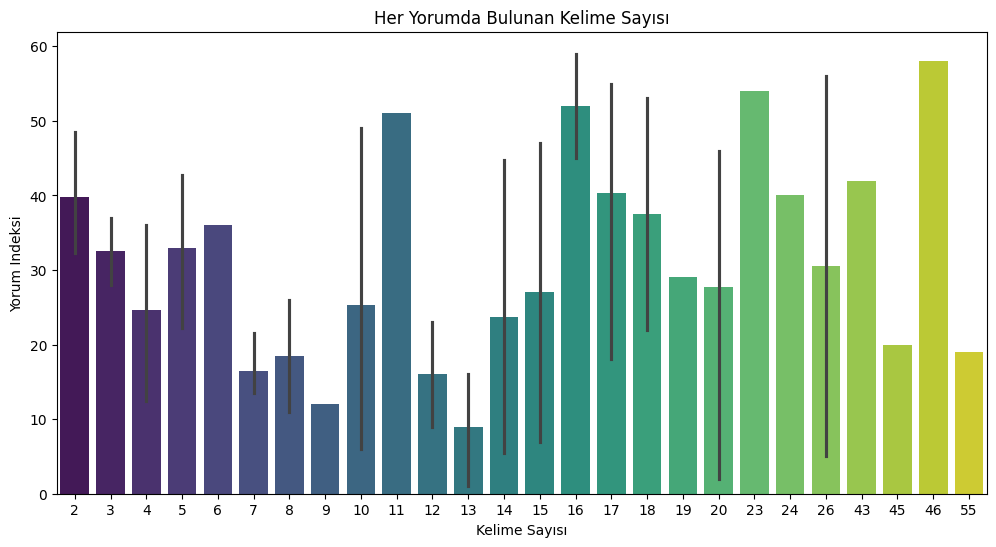

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Her cümledeki kelime sayısını hesapla
def count_words(comment):
    return len(re.findall(r'\w+', comment))

# Kelime sayılarını hesapla ve yeni bir sütun ekle
df['Kelime Sayısı'] = df['Yorum'].apply(count_words)

# DataFrame'i görselleştir
plt.figure(figsize=(12, 6))
sns.barplot(x='Kelime Sayısı', y=df.index, data=df, palette='viridis')
plt.title('Her Yorumda Bulunan Kelime Sayısı')
plt.xlabel('Kelime Sayısı')
plt.ylabel('Yorum Indeksi')
plt.show()


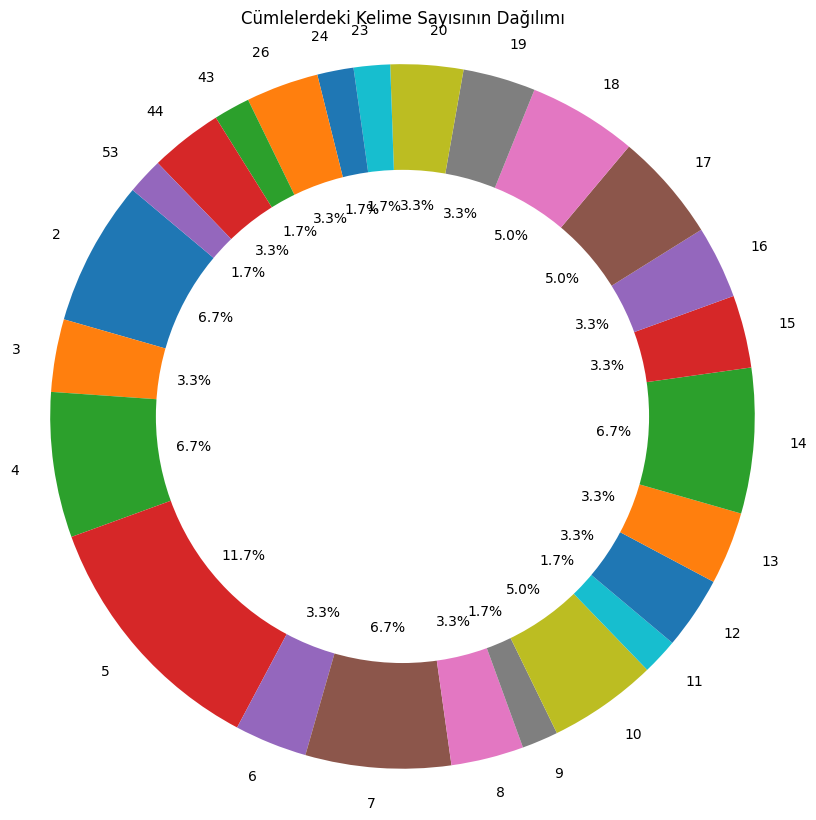

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Her cümledeki kelime sayısını hesapla
def count_words(comment):
    return len(comment.split())

# Kelime sayılarını hesapla ve yeni bir sütun ekle
df['Kelime Sayısı'] = df['Yorum'].apply(count_words)

# Kelime sayılarını gruplandır
kelime_sayilari = df['Kelime Sayısı'].value_counts().sort_index()

# Grafik oluştur
plt.figure(figsize=(10, 10))
plt.pie(kelime_sayilari, labels=kelime_sayilari.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Ortayı beyaz daire ile kapat
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Cümlelerdeki Kelime Sayısının Dağılımı')
plt.axis('equal')  # Eşit eksen
plt.show()


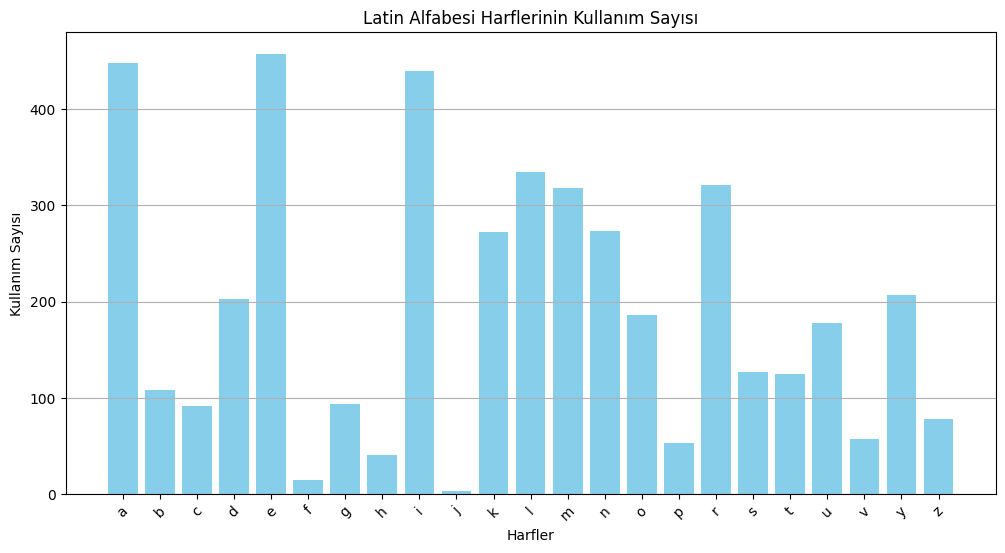

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Yorumları birleştir
yorumlar = ' '.join(df['Yorum'].astype(str))  # Yorum sütununu birleştir

# Harfleri say
harfler = [char.lower() for char in yorumlar if char in string.ascii_lowercase]  # Sadece Latin harflerini al
harf_sayisi = Counter(harfler)  # Harf sayımını yap

# Harf sayısını DataFrame'e çevir
harf_df = pd.DataFrame(harf_sayisi.items(), columns=['Harf', 'Adet'])
harf_df = harf_df.sort_values(by='Harf')  # Harflere göre sırala

# Grafiği çiz
plt.figure(figsize=(12, 6))
plt.bar(harf_df['Harf'], harf_df['Adet'], color='skyblue')
plt.title('Latin Alfabesi Harflerinin Kullanım Sayısı')
plt.xlabel('Harfler')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Grafiği göster
plt.show()


In [ ]:
import pandas as pd
from collections import Counter
import string

# CSV dosyasını oku
file_path = '/content/yorum.csv'  # Dosya yolunu belirtin
df = pd.read_csv(file_path)

# Yorumları birleştir
yorumlar = ' '.join(df['Yorum'].astype(str))  # Yorum sütununu birleştir

# Harfleri say
harfler = [char.lower() for char in yorumlar if char in string.ascii_lowercase]  # Sadece Latin harflerini al
harf_sayisi = Counter(harfler)  # Harf sayımını yap

# Sonuçları yazdır
print("Latin Alfabesi Harflerinin Kullanım Sayısı:")
for harf, adet in sorted(harf_sayisi.items()):
    print(f"{harf}: {adet}")


Latin Alfabesi Harflerinin Kullanım Sayısı:
a: 448
b: 108
c: 92
d: 203
e: 457
f: 15
g: 94
h: 41
i: 440
j: 3
k: 272
l: 335
m: 318
n: 273
o: 186
p: 53
r: 321
s: 127
t: 125
u: 178
v: 57
y: 207
z: 78
